In [2]:
import pandas as pd

In [3]:
pd.__version__

'2.2.3'

In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-09-17 10:58:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
200 OKequest sent, awaiting response... 
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.004s  

2025-09-17 10:58:48 (191 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.shape

(9704, 11)

In [6]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [7]:
df.engine_displacement.count()

np.int64(9704)

In [8]:
len(df)

9704

In [9]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [10]:
k = df.fuel_type.unique()

In [11]:
print(k)

['Gasoline' 'Diesel']


In [12]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [13]:
(len(df)-df.count())>0

engine_displacement    False
num_cylinders           True
horsepower              True
vehicle_weight         False
acceleration            True
model_year             False
origin                 False
fuel_type              False
drivetrain             False
num_doors               True
fuel_efficiency_mpg    False
dtype: bool

In [14]:
df.columns[(len(df)-df.count())>0]

Index(['num_cylinders', 'horsepower', 'acceleration', 'num_doors'], dtype='object')

In [15]:
df.origin.unique()

array(['Europe', 'USA', 'Asia'], dtype=object)

In [16]:
# Filter cars from Asia, find max_fuel_eff
df_asia = df[df.origin == "Asia"]

In [17]:
df_asia.fuel_efficiency_mpg.max()

23.759122836520497

In [18]:
df.horsepower.median()

149.0

In [19]:
df[df['horsepower'] == 149].count()

engine_displacement    124
num_cylinders          121
horsepower             124
vehicle_weight         124
acceleration           108
model_year             124
origin                 124
fuel_type              124
drivetrain             124
num_doors              112
fuel_efficiency_mpg    124
dtype: int64

In [20]:
df.horsepower.mode()

0    152.0
Name: horsepower, dtype: float64

In [21]:
import matplotlib.pyplot as plt

<Axes: >

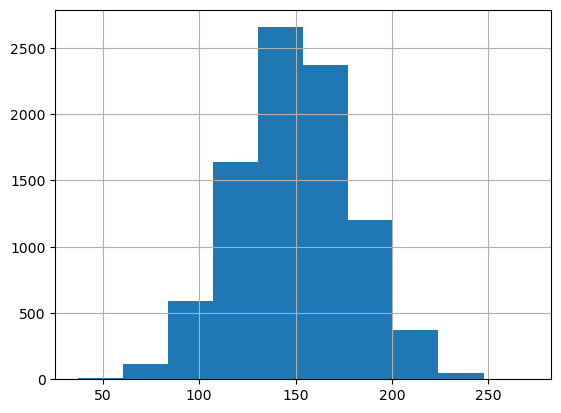

In [22]:
(df.horsepower).hist()

In [23]:
df['horsepower'] = df['horsepower'].fillna(152.0)

In [24]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,152.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [25]:
df.horsepower.median()

152.0

In [29]:
df_asia_sub = df_asia[['vehicle_weight', 'model_year']][:7]

In [31]:
df_asia_sub

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


In [35]:
X = df_asia_sub.values

In [43]:
XTX = X.T @ X

In [44]:
XTX_inv = np.linalg.inv(XTX)

In [38]:
y = [1100, 1300, 800, 900, 1000, 1100, 1200]

In [39]:
import numpy as np

In [46]:
w = XTX_inv @ X.T @ y  

In [47]:
sum(w)

np.float64(0.5187709081074007)